<a href="https://colab.research.google.com/github/BazaiHassan/tesnorflow-DeepLearning/blob/main/insurance_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# loading df
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# To prepare our data we can use some important classes from scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Normalize between 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Creating Features dataset and Labels datasets
X = df.drop('charges', axis=1)
y = df['charges']

# Create Test and Train from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization MinMaxScaler, OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# Check Data
X_train_normal.shape

(1070, 11)

In [ ]:
# Create model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="First_layer"),
    tf.keras.layers.Dense(10, name="Second_layer"),
    tf.keras.layers.Dense(1, name="Last_layer")
])

# Compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics =["mae"]
)

In [ ]:
# Fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3167.8633 - mae: 3167.8633


[3167.86328125, 3167.86328125]

In [ ]:
# Check if the output results of insurance_model.evaluate(X_test,y_test) is reasonable or not
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Text(0.5, 0, 'epochs')

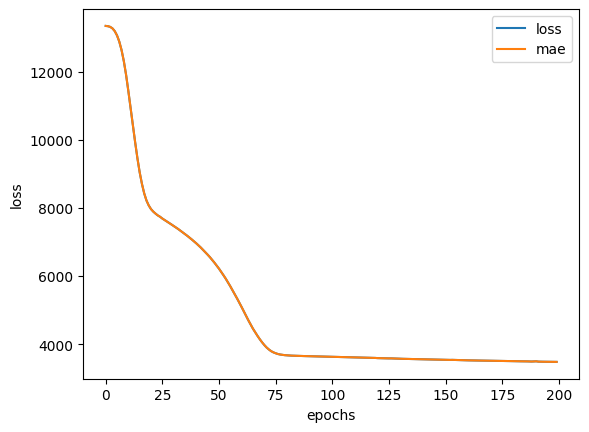

In [ ]:
# Plot training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
